In [42]:
from aws_helper import *
import matplotlib.pyplot as plt
from matplotlib import colormaps

#### Intro

This is an example notebook for the usage of the MIS functionalities. For the underlying code refer to aws_helper.py.


In [43]:
# We first define the hyperparameters, which are passed to the function. This format is used as it is the way hyperparameters work also for hybrid jobs,
# when the function is deployed to AWS Braket.

hp = {'graph_parameter': f'g{3}', # which graph is chosen
'n_shots': '100', # number of shots
'ndp': '2', # number of detuning points
'n_initialpoints': '9', # number of initial points. Additionally, the linear schedule is used, so the total number of initial is n_initialpoints + 1
'n_iterations': '50', # number of BO iterations
"percentile": "0.5", # percentile of the energies chosen for the FoM
"drivetype":"lowpass", # type of the detuning schedule
"lattice_scale": f"{5.3/4.5}", # scale of the lattice. to be multiplied * 4.5 \micro\meter
"postselection": "0", # whether to use postselection on the correct initialization of the device
"optimize_rabi": "0", # whether to optimize the Rabi frequency schedule
"t_total": "7e-7", # total time of the protocol
"alpha": "1.2" # penalty parameter for the FoM
}

In [44]:
# if the hyperparameters are passed as an argument to the function, the run_job function runs in local mode

optimizer, initial_bitstrings, best_bitstrings = run_job(hp)

Job started!!!!!
Register generated!
Iteration 1 completed!
{0: {'params': {'omega_max': 15800000.0, 'delta_initial': 30000000.0, 'delta_final': 60000000.0, 'tau': 0.1, 'dp1': 0.3333333333333333, 'dp2': 0.6666666666666666}, 'target': 3.655}}
Iteration 2 completed!
Iteration 3 completed!
Iteration 4 completed!
Iteration 5 completed!
Iteration 6 completed!
Iteration 7 completed!
Iteration 8 completed!
Iteration 9 completed!
Iteration 10 completed!
Point suggested; kappa=2.000.
Iteration 11 completed!
Point suggested; kappa=2.000.
Iteration 12 completed!
Point suggested; kappa=2.000.
Iteration 13 completed!
Point suggested; kappa=2.000.
Iteration 14 completed!
Point suggested; kappa=2.000.
Iteration 15 completed!
Point suggested; kappa=2.000.
Iteration 16 completed!
Point suggested; kappa=2.000.
Iteration 17 completed!
Point suggested; kappa=2.000.
Iteration 18 completed!
Point suggested; kappa=2.000.
Iteration 19 completed!
Point suggested; kappa=2.000.
Iteration 20 completed!
Point sugg

In [45]:
register, graph = prepare_grid_register(which=int(hp['graph_parameter'][1:]), a=float(hp['lattice_scale']) * 4.5e-6, parallel=False)
pos = np.transpose([register.coordinate_list(i) for i in range(2)])

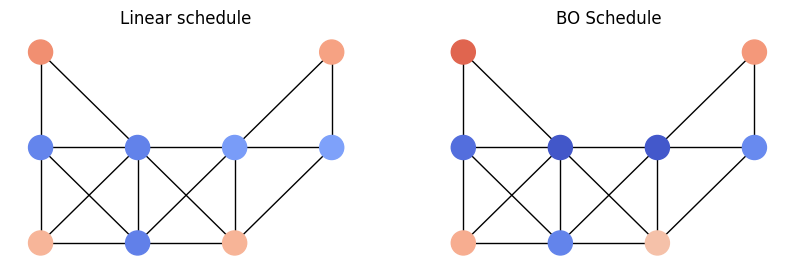

In [50]:
cm = colormaps['coolwarm']


fig, axs = plt.subplots(ncols=2, figsize=(10, 3))

ax1, ax2 = axs
ax1.set_title(f"Linear schedule")
nx.draw(graph, pos=pos, ax=ax1, node_color=cm(1-np.mean(initial_bitstrings, axis=0)))


ax2.set_title("BO Schedule")
nx.draw(graph, pos=pos, node_color=cm(1-np.mean(best_bitstrings, axis=0)), ax=ax2)




Should you want to run this on the QuEra device, I found it easiest to spin up a Sagemaker instance and run it through that, with the following command:

In [ ]:
job = AwsQuantumJob.create(
    device="arn:aws:braket:us-east-1::device/qpu/quera/Aquila",
    source_module="aws_helper.py",
    entry_point="aws_helper:run_job",
    input_data={"easy-graphs": f'easy-graphs/eg{gi}.txt'},
    job_name=f"insertnamehere",
    wait_until_complete=False,
    hyperparameters=hp,
    image_uri="175919606347.dkr.ecr.us-east-1.amazonaws.com/amazon-braket-rudi:latest", # if you build your own image beforehand
#         copy_checkpoints_from_job="arn:aws:braket:us-east-1:175919606347:job/eg-1" # if you have a checkpoint (i.e., previously saved job)
)